# This notebook is used for summary analysis.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install evaluate --quiet
!pip install rouge_score --quiet
!pip install tensorflow==2.10 --quiet
!pip install nltk --quiet

In [ ]:
import evaluate
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np

from transformers import (
    T5Tokenizer,
    TFT5ForConditionalGeneration,
    PegasusTokenizer,
    TFPegasusForConditionalGeneration,
)
drive = '/content/drive/MyDrive'
summaries_drive = f'{drive}/Summaries'

In [ ]:
with open(f'{drive}/train_test_split.pkl', 'rb') as file:
    X_train, X_val, X_test, y_train, y_val, y_test = pickle.load(file)

In [ ]:
with open(f'{summaries_drive}/t5_base_summaries_500.pkl', 'rb') as file:
    t5_base = pickle.load(file)

with open(f'{summaries_drive}/t5_fine_tuned_10k_summaries_500.pkl', 'rb') as file:
    t5_fine_tuned_10k = pickle.load(file)

with open(f'{summaries_drive}/t5_fine_tuned_100k_summaries_500.pkl', 'rb') as file:
    t5_fine_tuned_100k = pickle.load(file)

with open(f'{summaries_drive}/t5_fine_tuned_full_summaries_500.pkl', 'rb') as file:
    t5_fine_tuned_full = pickle.load(file)

with open(f'{summaries_drive}/t5_fine_tuned_20Epochs_summaries_500.pkl', 'rb') as file:
    t5_fine_tuned_20Epochs = pickle.load(file)

with open(f'{summaries_drive}/pegasus_base_summaries_500.pkl', 'rb') as file:
    pegasus_base = pickle.load(file)

with open(f'{summaries_drive}/pegasus_fine_tuned_10k_summaries_500.pkl', 'rb') as file:
    pegasus_fine_tuned_10k = pickle.load(file)

with open(f'{summaries_drive}/pegasus_fine_tuned_100k_summaries_500.pkl', 'rb') as file:
    pegasus_fine_tuned_100k = pickle.load(file)

with open(f'{summaries_drive}/pegasus_fine_tuned_full_summaries_500.pkl', 'rb') as file:
    pegasus_fine_tuned_full = pickle.load(file)

with open(f'{summaries_drive}/pegasus_fine_tuned_20Epochs_summaries_500.pkl', 'rb') as file:
    pegasus_fine_tuned_20Epochs = pickle.load(file)

In [ ]:
def collect_summaries(data_list):
  labels = []
  gen_summaries = []

  for data in data_list:
    labels.append(data['label'])
    gen_summaries.append(data['summaries'])

  return labels, gen_summaries

def compute_metrics(predictions, references):
  bleu = evaluate.load('bleu')
  rouge = evaluate.load('rouge')
  meteor = evaluate.load('meteor')

  return {"bleu": bleu.compute(predictions=predictions, references=references),
          "rouge": rouge.compute(predictions=predictions, references=references),
          "meteor": meteor.compute(predictions=predictions, references=references)}

In [ ]:
# T5 - Base
t5_base_labels, t5_base_gen_summaries = collect_summaries(t5_base)
t5_base_metrics = compute_metrics(t5_base_gen_summaries, t5_base_labels)

# T5 - Fine Tuned 10k
t5_fine_tuned_10k_labels, t5_fine_tuned_10k_gen_summaries = collect_summaries(t5_fine_tuned_10k)
t5_fine_tuned_10k_metrics = compute_metrics(
    t5_fine_tuned_10k_gen_summaries,
    t5_fine_tuned_10k_labels)

# T5 - Fine Tuned 100k
t5_fine_tuned_100k_labels, t5_fine_tuned_100k_gen_summaries = collect_summaries(t5_fine_tuned_100k)
t5_fine_tuned_100k_metrics = compute_metrics(
    t5_fine_tuned_100k_gen_summaries,
    t5_fine_tuned_100k_labels)

# T5 - Fine Tuned Full
t5_fine_tuned_full_labels, t5_fine_tuned_full_gen_summaries = collect_summaries(t5_fine_tuned_full)
t5_fine_tuned_full_metrics = compute_metrics(
    t5_fine_tuned_full_gen_summaries,
    t5_fine_tuned_full_labels)

# T5 - Fine Tuned 20Epochs
t5_fine_tuned_20Epochs_labels, t5_fine_tuned_20Epochs_gen_summaries = collect_summaries(t5_fine_tuned_20Epochs)
t5_fine_tuned_20Epochs_metrics = compute_metrics(
    t5_fine_tuned_20Epochs_gen_summaries,
    t5_fine_tuned_20Epochs_labels)

# PEGASUS - Base
pegasus_base_labels, pegasus_base_gen_summaries = collect_summaries(pegasus_base)
pegasus_base_metrics = compute_metrics(
    pegasus_base_gen_summaries,
    pegasus_base_labels)

# PEGASUS - Fine Tuned 10k
pegasus_fine_tuned_10k_labels, pegasus_fine_tuned_10k_gen_summaries = collect_summaries(pegasus_fine_tuned_10k)
pegasus_fine_tuned_10k_metrics = compute_metrics(
    pegasus_fine_tuned_10k_gen_summaries,
    pegasus_fine_tuned_10k_labels)

# PEGASUS - Fine Tuned 100k
pegasus_fine_tuned_100k_labels, pegasus_fine_tuned_100k_gen_summaries = collect_summaries(pegasus_fine_tuned_100k)
pegasus_fine_tuned_100k_metrics = compute_metrics(
    pegasus_fine_tuned_100k_gen_summaries,
    pegasus_fine_tuned_100k_labels)

# PEGASUS - Fine Tuned Full
pegasus_fine_tuned_full_labels, pegasus_fine_tuned_full_gen_summaries = collect_summaries(pegasus_fine_tuned_full)
pegasus_fine_tuned_full_metrics = compute_metrics(
    pegasus_fine_tuned_full_gen_summaries,
    pegasus_fine_tuned_full_labels)

# PEGASUS - Fine Tuned 20Epochs
pegasus_fine_tuned_20Epochs_labels, pegasus_fine_tuned_20Epochs_gen_summaries = collect_summaries(pegasus_fine_tuned_20Epochs)
pegasus_fine_tuned_20Epochs_metrics = compute_metrics(
    pegasus_fine_tuned_20Epochs_gen_summaries,
    pegasus_fine_tuned_20Epochs_labels)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 

In [ ]:
metrics_df = pd.DataFrame([
    t5_base_metrics,
    t5_fine_tuned_10k_metrics,
    t5_fine_tuned_100k_metrics,
    t5_fine_tuned_full_metrics,
    t5_fine_tuned_20Epochs_metrics,
    pegasus_base_metrics,
    pegasus_fine_tuned_10k_metrics,
    pegasus_fine_tuned_100k_metrics,
    pegasus_fine_tuned_full_metrics,
    pegasus_fine_tuned_20Epochs_metrics], index=['T5-Base', 'T5-10k', 'T5-100k', 'T5-Full', 'T5-20Epochs', 'PEGASUS-Base', 'PEGASUS-10k', 'PEGASUS-100K', 'PEGASUS-Full', 'PEGASUS-20Epochs'])

# Extract only what we need.
metrics_df['BLEU'] = metrics_df['bleu'].apply(lambda x: x.get('bleu')) * 100
metrics_df['R1'] = metrics_df['rouge'].apply(lambda x: x.get('rouge1')) * 100
metrics_df['R2'] = metrics_df['rouge'].apply(lambda x: x.get('rouge2')) * 100
metrics_df['RL'] = metrics_df['rouge'].apply(lambda x: x.get('rougeL')) * 100
metrics_df['METEOR'] = metrics_df['meteor'].apply(lambda x: x.get('meteor')) * 100
pd.set_option('display.precision', 3)

# Drop other columns.
metrics_df = metrics_df.drop(columns=['bleu', 'rouge', 'meteor'])

# Save
metrics_df.to_pickle(f'{drive}/metrics.pkl')

# Set to 3 sigfigs.
metrics_df = metrics_df.round(2)
metrics_df

BLEU     R1    R2     RL  METEOR
T5-Base           1.82  16.83  3.52  12.22   18.69
T5-10k            2.93  19.05  5.41  15.21   16.98
T5-100k           3.00  18.98  5.49  15.58   16.82
T5-Full           3.74  20.36  6.53  17.12   17.85
T5-20Epochs       2.73  18.79  4.61  15.09   16.41
PEGASUS-Base      0.71  11.84  1.75   9.37    9.24
PEGASUS-10k       1.95  17.45  4.95  14.29   14.34
PEGASUS-100K      2.26  18.28  5.48  15.18   15.12
PEGASUS-Full      2.99  19.59  6.21  16.39   16.75
PEGASUS-20Epochs  2.00  17.03  3.72  13.40   14.33

In [ ]:
# NOTE: This was edited in latex since some formatting items are not supported in to_latex().
print(metrics_df.to_latex(caption="The BLEU, ROUGE, and METEOR results on the TL;DR test set.", label="tab:metrics_table", column_format="l|c|c|c|c|c", float_format="%.2f", escape=True))

\begin{table}
\caption{The BLEU, ROUGE, and METEOR results on the TL;DR test set.}
\label{tab:metrics_table}
\begin{tabular}{l|c|c|c|c|c}
\toprule
 & BLEU & R1 & R2 & RL & METEOR \\
\midrule
T5-Base & 1.82 & 16.83 & 3.52 & 12.22 & 18.69 \\
T5-10k & 2.93 & 19.05 & 5.41 & 15.21 & 16.98 \\
T5-100k & 3.00 & 18.98 & 5.49 & 15.58 & 16.82 \\
T5-Full & 3.74 & 20.36 & 6.53 & 17.12 & 17.85 \\
T5-20Epochs & 2.73 & 18.79 & 4.61 & 15.09 & 16.41 \\
PEGASUS-Base & 0.71 & 11.84 & 1.75 & 9.37 & 9.24 \\
PEGASUS-10k & 1.95 & 17.45 & 4.95 & 14.29 & 14.34 \\
PEGASUS-100K & 2.26 & 18.28 & 5.48 & 15.18 & 15.12 \\
PEGASUS-Full & 2.99 & 19.59 & 6.21 & 16.39 & 16.75 \\
PEGASUS-20Epochs & 2.00 & 17.03 & 3.72 & 13.40 & 14.33 \\
\bottomrule
\end{tabular}
\end{table}



In [ ]:
t5_base_gen_summaries[0]

'mechanic has a 2000 gmc 1 ton with a "belly leaker" compressor . it\'s just been rebuilt because it was blowing so so.. fairly cool . i\'d just like to return this thing to a near OEM state so it is usable in the desert .'

In [ ]:
t5_fine_tuned_10k_gen_summaries[0]

'I have a 2000 GMC 1 Ton with a Delphi HT6 "belly leaker" compressor. It\'s blowing so cool, it\'s blowing cold, it\'s not working as expected. I\'d like to return it to a near OEM state so it is usable to drive around in the desert.'

In [ ]:
t5_fine_tuned_100k_gen_summaries[0]

'I have a 2000 GMC 1 Ton with Delphi HT6 "belly leaker" compressor. It\'s been rebuilt and I\'m wondering if I should return it to a near OEM state so it is usable to drive around in the desert at 100+ Fahrenheit.'

In [ ]:
t5_fine_tuned_full_gen_summaries[0]

'2000 GMC 1 Ton with Delphi HT6 "belly leaker" compressor. Replaced parts, cleaned out blower fan, cleaned out evaporator, cleaned out evaporator, cleaned out blower fan, cleaned out evaporator, cleaned out evaporator, cleaned out evaporator, cleaned out evaporator, cleaned out evaporator, cleaned out evaporator, cleaned out evaporator, cleaned out evaporator'

In [ ]:
t5_fine_tuned_20Epochs_gen_summaries[0]

'I recently moved to Arizona and the ac system is not performing as expected. Is there anything I can do to prevent it from running hot?'

In [ ]:
pegasus_base_gen_summaries[0]

"I've got an AC system in my truck."

In [ ]:
pegasus_fine_tuned_10k_gen_summaries[0]

'I have a 2000 GMC 1 Ton with the Delphi HT6 "belly leaker" compressor. It blew cold. I replaced it with a new one. It blew cold again. What do I do?'

In [ ]:
pegasus_fine_tuned_100k_gen_summaries[0]

'I have a 2000 GMC 1 Ton with the Delphi HT6 "belly leaker" air conditioning system. It\'s been rebuilt and it\'s blowing cold. I\'ve cleaned it and it\'s still blowing cold. I don\'t know what to do.'

In [ ]:
pegasus_fine_tuned_full_gen_summaries[0]

'2000 GMC 1 Ton with Delphi HT6 "belly leaker" AC compressor. Rebuilt, replaced, cleaned, re-filled, replaced, replaced, replaced, replaced, replaced, replaced, replaced, replaced, replaced, replaced, replaced, replaced, replaced, replaced, replaced, replaced, replaced.'

In [ ]:
pegasus_fine_tuned_20Epochs_gen_summaries[0]

"I have a 2000 1 Ton GMC truck with a HT6 AC that has been in the desert for over a year. It's been doing pretty well until I started driving it again and it started to get really hot. It's been steadily dropping in temperature ever since. The last time I was driving it was about 3 months ago and it was running pretty good until I started noticing problems. It's been steadily dropping in temperature ever since. It's been steadily dropping in temperature ever since"

In [ ]:
# Load the history files
with open(f'{drive}/Training_10k/t5_training_history_10k.pkl', 'rb') as file:
    t5_training_history_10k = pickle.load(file)

with open(f'{drive}/Training_100k/t5_training_history_100k.pkl', 'rb') as file:
    t5_training_history_100k = pickle.load(file)

# with open(f'{drive}/Training_full/t5_training_history.pkl', 'rb') as file:
#     t5_training_history_full.history = pickle.load(file)

with open(f'{drive}/Training_20Epochs/t5_training_history_20Epochs.pkl', 'rb') as file:
    t5_training_history_20Epochs = pickle.load(file)

with open(f'{drive}/Training_10k/pegasus_training_history_10k.pkl', 'rb') as file:
    pegasus_training_history_10k = pickle.load(file)

with open(f'{drive}/Training_100k/pegasus_training_history_100k.pkl', 'rb') as file:
    pegasus_training_history_100k = pickle.load(file)

with open(f'{drive}/Training_full/pegasus_training_history.pkl', 'rb') as file:
    pegasus_training_history_full = pickle.load(file)

with open(f'{drive}/Training_20Epochs/pegasus_training_history_20Epochs.pkl', 'rb') as file:
    pegasus_training_history_20Epochs = pickle.load(file)

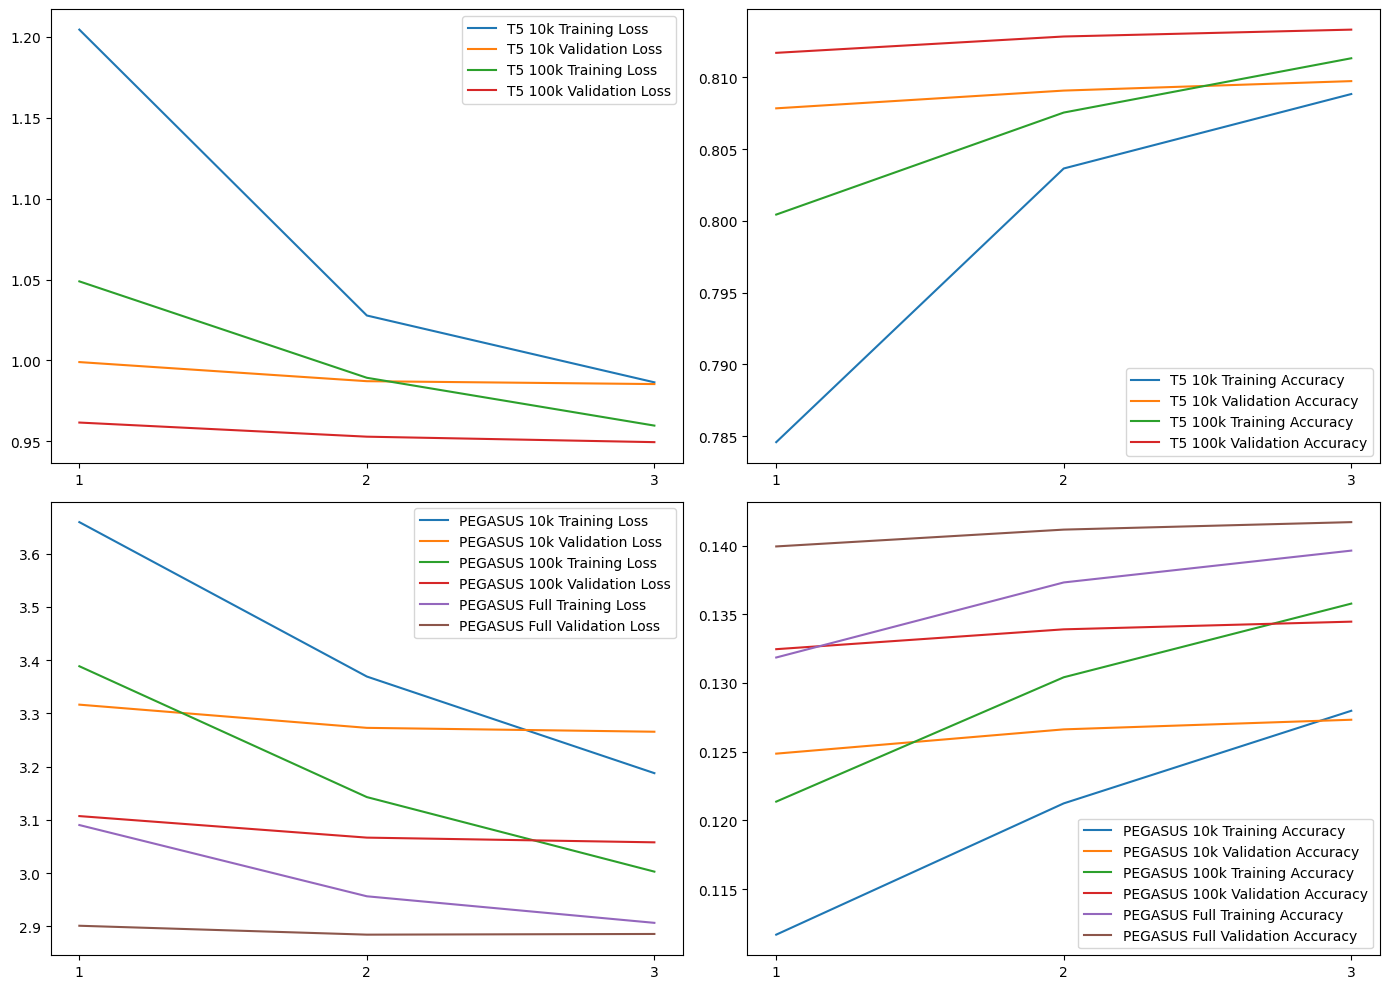

In [ ]:
# Define the number of epochs
epochs = range(1, 4)

# Plot training and validation loss for T5 and PEGASUS versions
plt.figure(figsize=(14, 10))

# Plot Loss
plt.subplot(2, 2, 1)
plt.plot(epochs, t5_training_history_10k['loss'], label='T5 10k Training Loss')
plt.plot(epochs, t5_training_history_10k['val_loss'], label='T5 10k Validation Loss')
plt.plot(epochs, t5_training_history_100k['loss'], label='T5 100k Training Loss')
plt.plot(epochs, t5_training_history_100k['val_loss'], label='T5 100k Validation Loss')
# plt.plot(epochs, t5_training_history_full['loss'], label='T5 Full Training Loss')
# plt.plot(epochs, t5_training_history_full['val_loss'], label='T5 Full Validation Loss')

# Commented out for research paper.
# plt.title('T5 - Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
plt.xticks(epochs)
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(epochs, t5_training_history_10k['accuracy'], label='T5 10k Training Accuracy')
plt.plot(epochs, t5_training_history_10k['val_accuracy'], label='T5 10k Validation Accuracy')
plt.plot(epochs, t5_training_history_100k['accuracy'], label='T5 100k Training Accuracy')
plt.plot(epochs, t5_training_history_100k['val_accuracy'], label='T5 100k Validation Accuracy')
# plt.plot(epochs, t5_training_history_full['accuracy'], label='T5 Full Training Accuracy')
# plt.plot(epochs, t5_training_history_full['val_accuracy'], label='T5 Full Validation Accuracy')

# Commented out for research paper.
# plt.title('T5 - Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(epochs, pegasus_training_history_10k['loss'], label='PEGASUS 10k Training Loss')
plt.plot(epochs, pegasus_training_history_10k['val_loss'], label='PEGASUS 10k Validation Loss')
plt.plot(epochs, pegasus_training_history_100k['loss'], label='PEGASUS 100k Training Loss')
plt.plot(epochs, pegasus_training_history_100k['val_loss'], label='PEGASUS 100k Validation Loss')
plt.plot(epochs, pegasus_training_history_full['loss'], label='PEGASUS Full Training Loss')
plt.plot(epochs, pegasus_training_history_full['val_loss'], label='PEGASUS Full Validation Loss')

# Commented out for research paper.
# plt.title('PEGASUS - Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
plt.xticks(epochs)
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(epochs, pegasus_training_history_10k['accuracy'], label='PEGASUS 10k Training Accuracy')
plt.plot(epochs, pegasus_training_history_10k['val_accuracy'], label='PEGASUS 10k Validation Accuracy')
plt.plot(epochs, pegasus_training_history_100k['accuracy'], label='PEGASUS 100k Training Accuracy')
plt.plot(epochs, pegasus_training_history_100k['val_accuracy'], label='PEGASUS 100k Validation Accuracy')
plt.plot(epochs, pegasus_training_history_full['accuracy'], label='PEGASUS Full Training Accuracy')
plt.plot(epochs, pegasus_training_history_full['val_accuracy'], label='PEGASUS Full Validation Accuracy')

# Commented out for research paper.
# plt.title('PEGASUS - Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.legend()

plt.tight_layout()
plt.show()

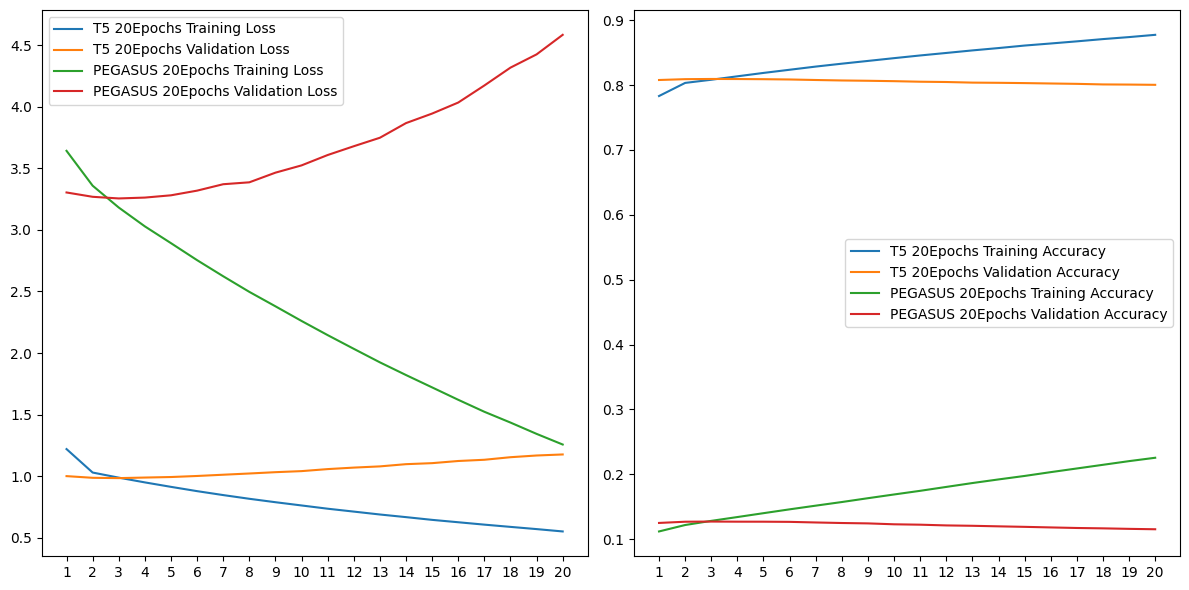

In [ ]:
# Define the number of epochs
epochs = range(1, 21)

# Plot training and validation loss for T5 and PEGASUS versions
plt.figure(figsize=(12, 6))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, t5_training_history_20Epochs['loss'], label='T5 20Epochs Training Loss')
plt.plot(epochs, t5_training_history_20Epochs['val_loss'], label='T5 20Epochs Validation Loss')
plt.plot(epochs, pegasus_training_history_20Epochs['loss'], label='PEGASUS 20Epochs Training Loss')
plt.plot(epochs, pegasus_training_history_20Epochs['val_loss'], label='PEGASUS 20Epochs Validation Loss')

# Commented out for research paper.
# plt.title('20 Epochs - Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
plt.xticks(epochs)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, t5_training_history_20Epochs['accuracy'], label='T5 20Epochs Training Accuracy')
plt.plot(epochs, t5_training_history_20Epochs['val_accuracy'], label='T5 20Epochs Validation Accuracy')
plt.plot(epochs, pegasus_training_history_20Epochs['accuracy'], label='PEGASUS 20Epochs Training Accuracy')
plt.plot(epochs, pegasus_training_history_20Epochs['val_accuracy'], label='PEGASUS 20Epochs Validation Accuracy')

# Commented out for research paper.
# plt.title('20 Epochs - Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
pegasus_training_history_20Epochs

{'loss': [3.641763687133789,
  3.358614444732666,
  3.181303024291992,
  3.028333902359009,
  2.892056941986084,
  2.7540273666381836,
  2.6232893466949463,
  2.4966354370117188,
  2.3793649673461914,
  2.260448694229126,
  2.145427942276001,
  2.0342328548431396,
  1.9244011640548706,
  1.8213132619857788,
  1.7209992408752441,
  1.6203950643539429,
  1.5231192111968994,
  1.4355199337005615,
  1.3437122106552124,
  1.257212519645691],
 'accuracy': [0.11190859973430634,
  0.1218172013759613,
  0.1282290369272232,
  0.1341053694486618,
  0.14006559550762177,
  0.14598387479782104,
  0.15166236460208893,
  0.15725375711917877,
  0.16315484046936035,
  0.16890214383602142,
  0.17454515397548676,
  0.18054300546646118,
  0.1865215003490448,
  0.19209355115890503,
  0.19746559858322144,
  0.203347310423851,
  0.20898601412773132,
  0.21464408934116364,
  0.22031505405902863,
  0.2254946231842041],
 'val_loss': [3.3036062717437744,
  3.2684824466705322,
  3.255162000656128,
  3.262127399444

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import random

def cosine_similarity_texts(texts):
  # Create the TF-IDF vectorizer
  vectorizer = TfidfVectorizer()

  # Transform the texts into TF-IDF vectors
  tfidf_matrix = vectorizer.fit_transform(texts)

  # Compute the cosine similarity matrix
  return cosine_similarity(tfidf_matrix)

def plot_similarity_matrix(similarity_matrix, labels, title):
  plt.figure(figsize=(10, 8))
  sns.heatmap(similarity_matrix, annot=True, cmap='coolwarm', xticklabels=labels, yticklabels=labels)
  plt.title(title)
  plt.xticks(rotation=90, fontsize=8)
  plt.yticks(rotation=0, fontsize=8)
  plt.tight_layout()
  plt.show()

def plot_multiple_heatmaps(similarity_matrices, random_summary_indices, labels, n_rows, n_cols):
  fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 30))
  axes = axes.flatten()

  for i in range(len(similarity_matrices)):
      sub_matrix = similarity_matrices[i]
      sns.heatmap(sub_matrix, annot=True, cmap='coolwarm', xticklabels=labels, yticklabels=labels, ax=axes[i], cbar=False)
      axes[i].set_title(f'Index: {random_summary_indices[i]}', fontsize=10)
      axes[i].tick_params(axis='x', rotation=90, labelsize=8)
      axes[i].tick_params(axis='y', rotation=0, labelsize=8)

  for j in range(len(similarity_matrices), len(axes)):
      axes[j].axis('off')

  plt.tight_layout(rect=[0, 0, 1, 0.96])
  plt.show()

def plot_model_performance(model_performance):
  df = pd.DataFrame(list(model_performance.items()), columns=['Model', 'Average Cosine Similarity'])

  plt.figure(figsize=(10, 6))
  sns.barplot(x='Model', y='Average Cosine Similarity', data=df, palette='viridis')
  plt.xlabel('Model')
  plt.ylabel('Average Cosine Similarity')
  plt.title('Model Performance Benchmarking Using Cosine Similarity')
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

In [ ]:
# Max number of summaries. All of them are the same size.
max_summaries = len(t5_base_gen_summaries)

# Get our reference summaries.
ref_summaries = y_test[:max_summaries]

# Number of summaries to show.
n_summaries = 10

# Pick random summaries to show.
random.seed(42)
random_summary_indices = random.sample(range(max_summaries), n_summaries)

all_summaries = [
  t5_base_gen_summaries,
  t5_fine_tuned_10k_gen_summaries,
  t5_fine_tuned_100k_gen_summaries,
  t5_fine_tuned_full_gen_summaries,
  t5_fine_tuned_20Epochs_gen_summaries,
  pegasus_base_gen_summaries,
  pegasus_fine_tuned_10k_gen_summaries,
  pegasus_fine_tuned_100k_gen_summaries,
  pegasus_fine_tuned_full_gen_summaries,
  pegasus_fine_tuned_20Epochs_gen_summaries,
  ref_summaries,
]

labels = [
  "T5-Base",
  "T5-10k",
  "T5-100k",
  "T5-Full",
  "T5-20Epochs",
  "PEGASUS-Base",
  "PEGASUS-10k",
  "PEGASUS-100k",
  "PEGASUS-Full",
  "PEGASUS-20Epochs",
  "REF",
]

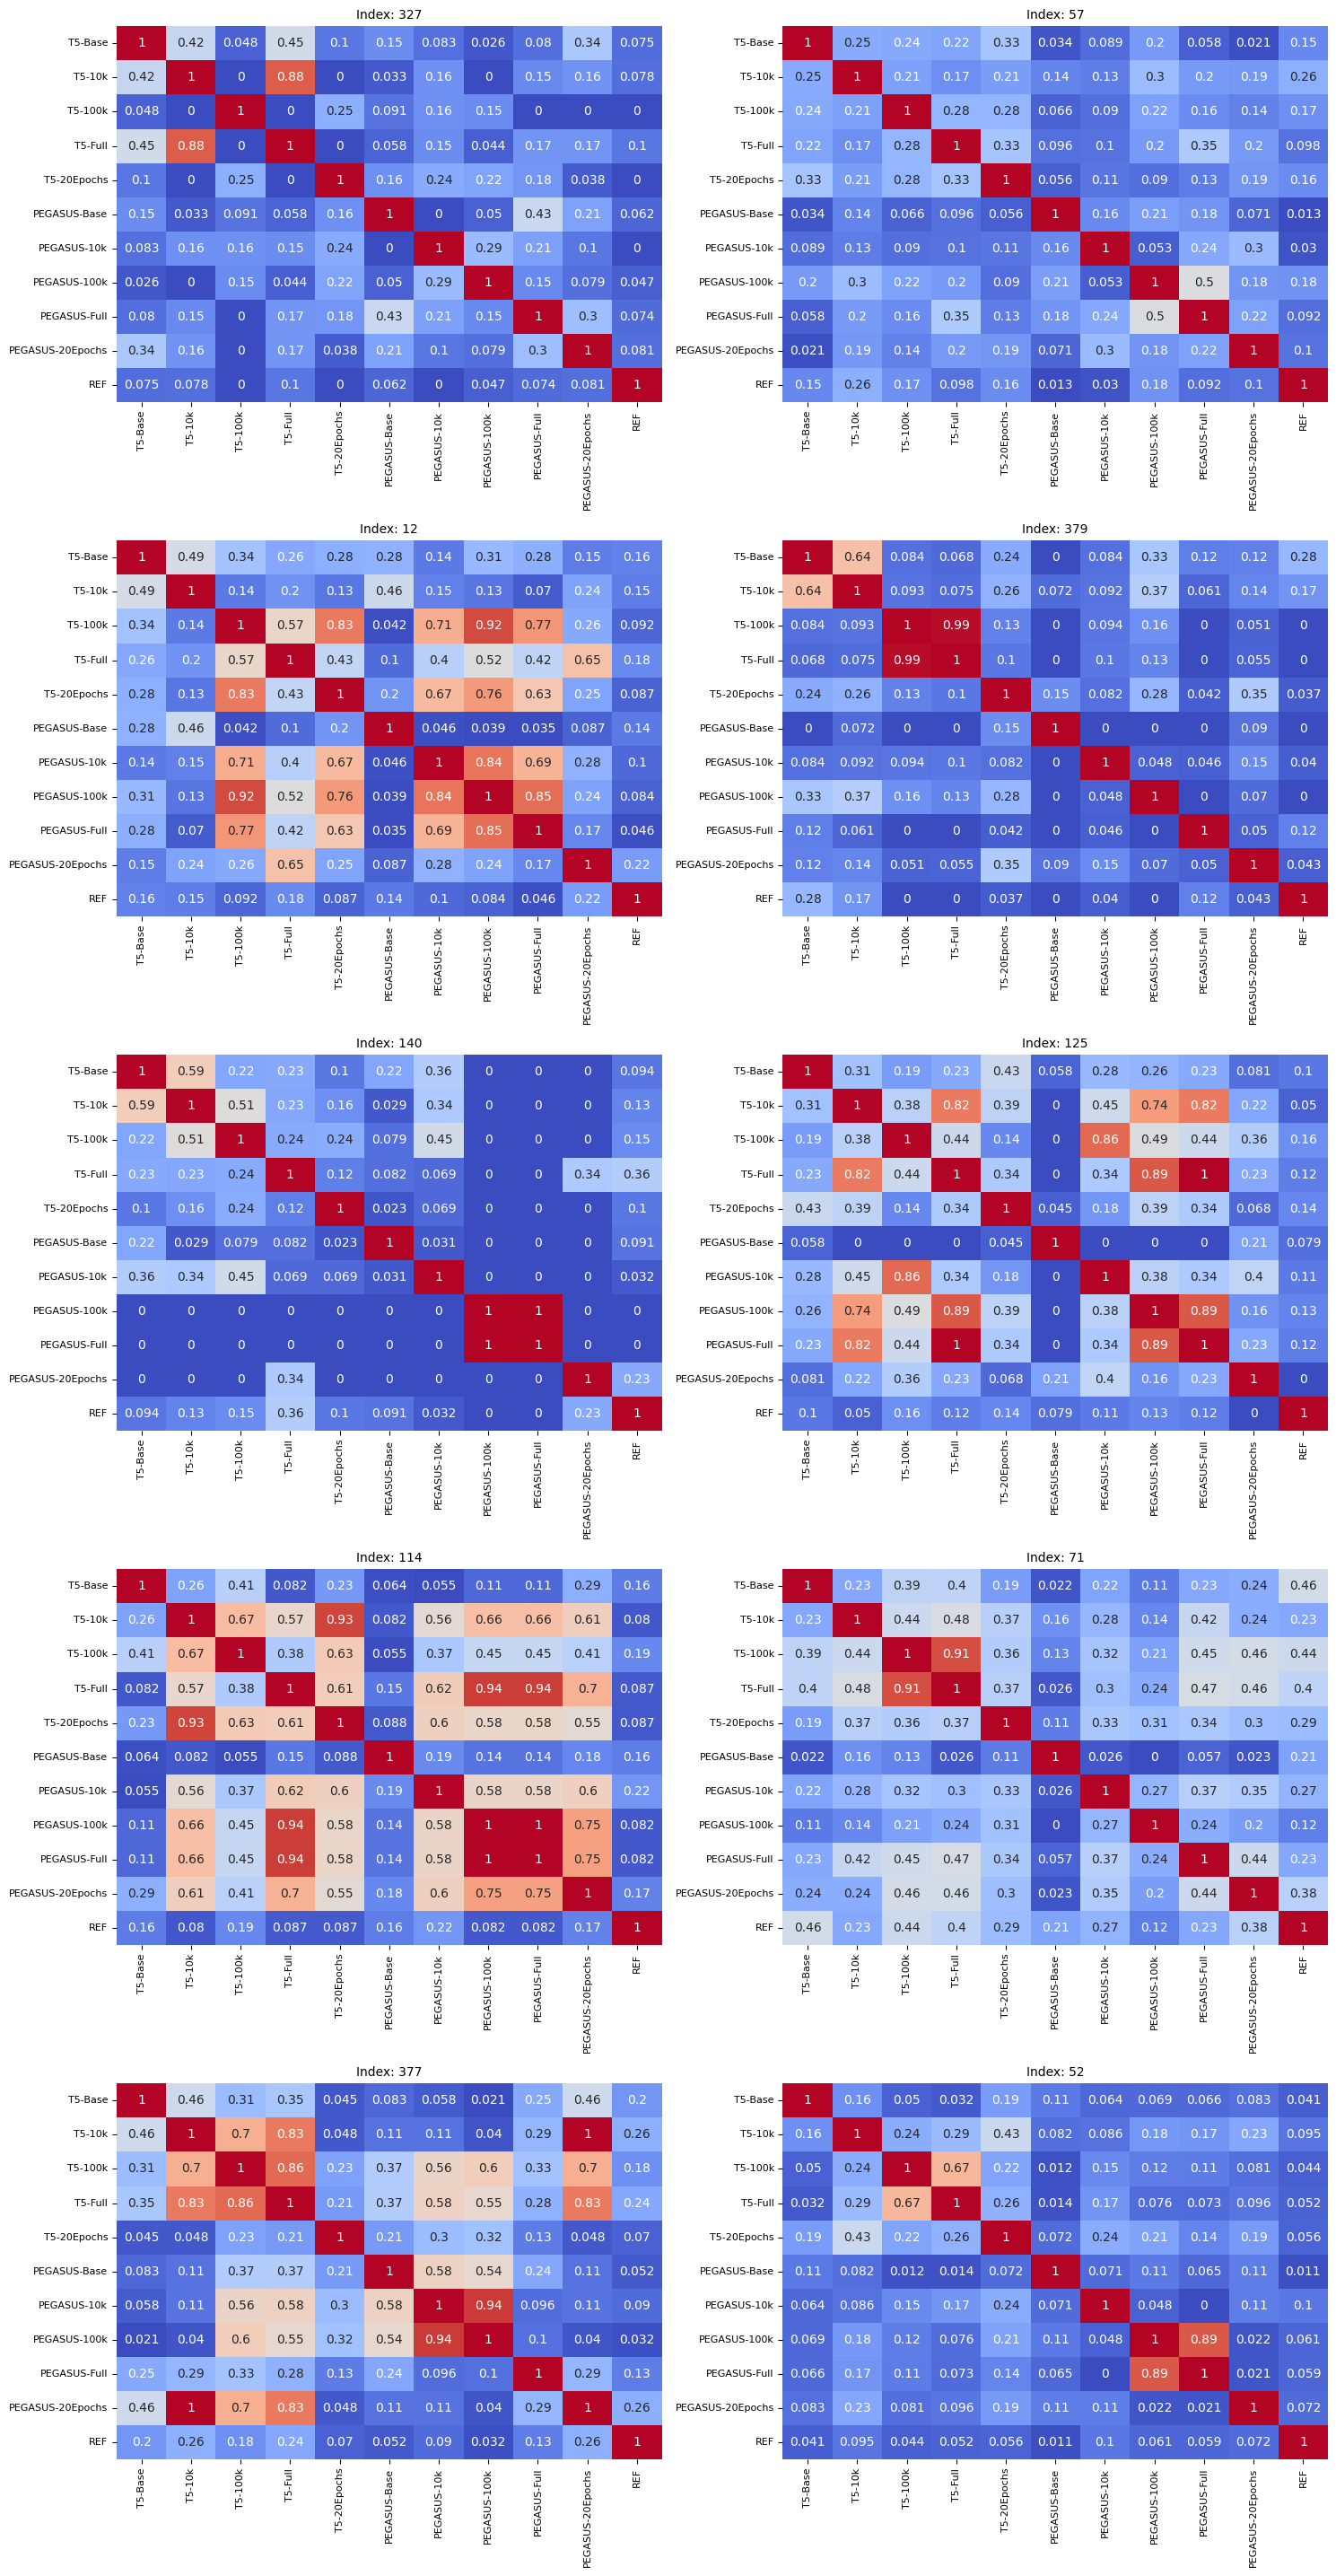

In [ ]:
# Dimensions of plot. Make this fit in LaTex neatly.
n_rows = 5
n_cols = 2

# Generate similarity matrices for each random index.
random_similarity_matrices = []
for i in random_summary_indices:
  texts = [summaries[i] for summaries in all_summaries]
  random_similarity_matrices.append(cosine_similarity_texts(texts))

plot_multiple_heatmaps(
    random_similarity_matrices,
    random_summary_indices,
    labels,
    n_rows,
    n_cols
)

In [ ]:
# Generate the average cosine similarity for all indices.
average_similarity_matrices = []
for i in range(max_summaries):
  texts = [summaries[i] for summaries in all_summaries]
  average_similarity_matrices.append(cosine_similarity_texts(texts))

average_similarity_matrix = np.mean(average_similarity_matrices, axis=0)

# Plot the average similarity matrix
# plot_similarity_matrix(average_similarity_matrix, labels, "Cosine Similarity - Average")

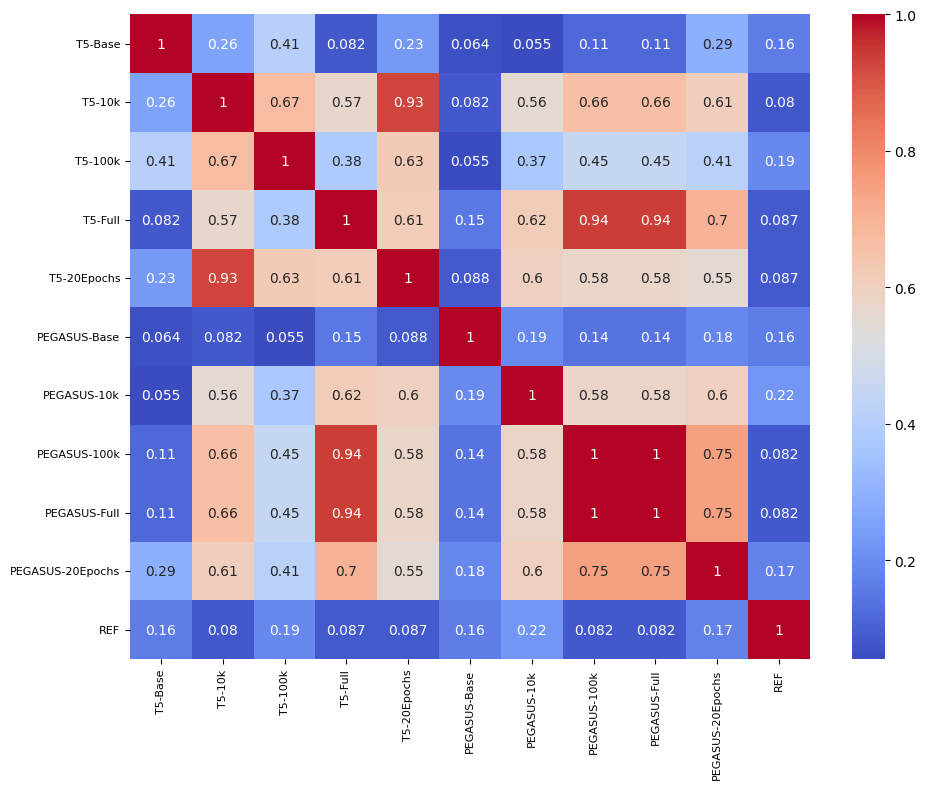

In [ ]:
# Generate the Cosine similarity for a specific index.
specific_i = 114
similarity_matrix = []

texts = [summaries[specific_i] for summaries in all_summaries]
similarity_matrix = cosine_similarity_texts(texts)

plot_similarity_matrix(similarity_matrix, labels, "")
# plot_similarity_matrix(similarity_matrix, labels, f"High Cosine Similarity - Index: {specific_i}")

In [ ]:
# Show summaries.
for model_name, summaries in zip(labels, all_summaries):
  print(f"{model_name}: {summaries[specific_i]}\n")

T5-Base: 'if he got a good offensive coordinator that could compete with modern college football, yes, but he would be acting as a figure head' 'Champ has 0 offensive knowledge, and can only work a defense.

T5-10k: Muschamp is a good defensive coordinator, but he's a figure head.

T5-100k: Muschamp is a good defensive coordinator, but he would be acting as a figure head.

T5-Full: Muschamp is a good defensive coordinator, not a good head coach.

T5-20Epochs: Muschamp is a good defensive coordinator. He's a figure head.

PEGASUS-Base: Will Muschamp has been named the new head coach at Florida.

PEGASUS-10k: Will Muschamp is a good defensive coordinator.

PEGASUS-100k: Muschamp is a good defensive coordinator, but not a good head coach.

PEGASUS-Full: Muschamp is a good defensive coordinator, but not a good head coach.

PEGASUS-20Epochs: Will Muschamp is a good head coach, but he is not a good offensive coordinator.

REF: If Roper pans out, people will look at Will as a good coach. If R

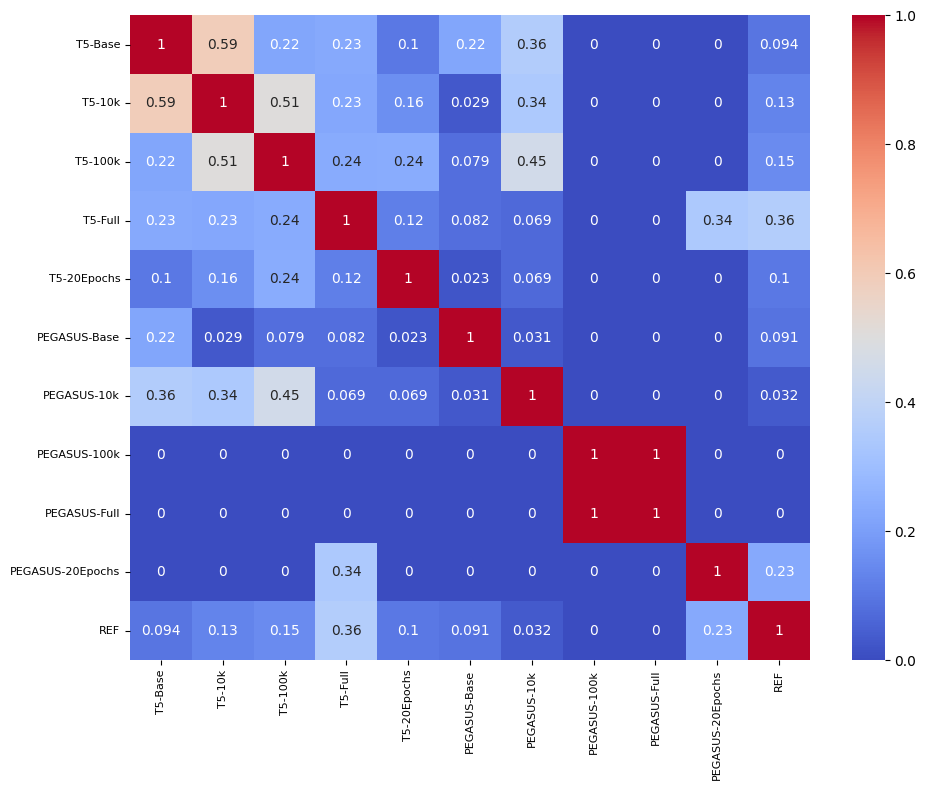

In [ ]:
# Generate the Cosine similarity for a specific index.
specific_i = 140
similarity_matrix = []

texts = [summaries[specific_i] for summaries in all_summaries]
similarity_matrix = cosine_similarity_texts(texts)

plot_similarity_matrix(similarity_matrix, labels, "")
# plot_similarity_matrix(similarity_matrix, labels, f"Low Cosine Similarity - Index: {specific_i}")

In [ ]:
# Show summaries.
for model_name, summaries in zip(labels, all_summaries):
  print(f"{model_name}: {summaries[specific_i]}\n")

T5-Base: music is a great way to escape reality, so don't let your mind wander too much . don't focus on your life, just think about the musical themes in your piece .

T5-10k: Don't let your mind wander too much, focus on the music. Enjoy!

T5-100k: Enjoy the music, focus on the music.

T5-Full: Warm up, enjoy the music, have an image in mind for each part of your piece.

T5-20Epochs: Enjoy your music, it can make all the difference between winning or losing.

PEGASUS-Base: This is a great way to get into the swing of things.

PEGASUS-10k: Don't worry about technique, just focus on the music.

PEGASUS-100k: Practice, practice, practice.

PEGASUS-Full: practice, practice, practice.

PEGASUS-20Epochs: Warm up, have fun!

REF: Warm up. Enjoy! Create images for the different parts of your pieces.



In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter


# Functions for n-gram metrics
def generate_ngrams_set(text, n):
  words = word_tokenize(text.lower())
  words = [word for word in words if word.isalnum()]
  return set(ngrams(words, n))

def generate_ngrams_list(text, n):
  words = word_tokenize(text.lower())
  words = [word for word in words if word.isalnum()]
  return list(ngrams(words, n))

def ngram_diversity(generated_text, n):
  generated_ngrams = generate_ngrams_list(generated_text, n)
  distinct_ngrams = set(generated_ngrams)

  return len(distinct_ngrams) / len(generated_ngrams) if len(distinct_ngrams) > 0 else 0

def ngram_abstractiveness(generated_text, reference_text, n):
  generated_ngrams = generate_ngrams_set(generated_text, n)
  reference_ngrams = generate_ngrams_set(reference_text, n)
  novel_ngrams = generated_ngrams - reference_ngrams
  return len(novel_ngrams) / len(generated_ngrams) if len(generated_ngrams) > 0 else 0

def plot_metric(df, metric):
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Model', y=metric, data=df)
    plt.xticks(rotation=45)

    # Commented out for research paper.
    # plt.title(f'{metric}')
    plt.xlabel("")
    plt.ylabel("")
    plt.tight_layout()
    plt.show()

In [ ]:
ngram_results_df_grouped = ngram_results_df.groupby('Model')[['Distinct-2', 'Distinct-3']].mean().sort_values(by=['Model'], ascending=False)

# NOTE: This was edited in latex since some formatting items are not supported in to_latex().
print(ngram_results_df_grouped.to_latex(caption="The Distinct-N values of our test set.", label="tab:distinct_n_table", column_format="l|c|c|c|c|c", float_format="%.2f", escape=True))

\begin{table}
\caption{The Distinct-N values of our test set.}
\label{tab:distinct_n_table}
\begin{tabular}{l|c|c|c|c|c}
\toprule
 & Distinct-2 & Distinct-3 \\
Model &  &  \\
\midrule
T5-Full & 92.94 & 93.62 \\
T5-Base & 94.82 & 96.67 \\
T5-20Epochs & 97.93 & 98.69 \\
T5-10k & 95.07 & 96.49 \\
T5-100k & 94.33 & 94.43 \\
REF & 97.58 & 97.23 \\
PEGASUS-Full & 93.41 & 92.29 \\
PEGASUS-Base & 95.25 & 95.91 \\
PEGASUS-20Epochs & 96.73 & 96.31 \\
PEGASUS-10k & 95.67 & 93.75 \\
PEGASUS-100k & 95.13 & 93.75 \\
\bottomrule
\end{tabular}
\end{table}



In [ ]:
ngram_results = {
  'Model': [],
  'Distinct-2': [],
  'Distinct-3': [],
  'Bigram Abstractiveness': [],
  'Trigram Abstractiveness': [],
}

for model_name, summaries in zip(labels, all_summaries):
  for summary, ref in zip(summaries, ref_summaries):
    ngram_results['Model'].append(model_name)

    ngram_results['Distinct-2'].append(ngram_diversity(summary, 2) * 100)
    ngram_results['Distinct-3'].append(ngram_diversity(summary, 3) * 100)

    ngram_results['Bigram Abstractiveness'].append(ngram_abstractiveness(summary, ref, 2))
    ngram_results['Trigram Abstractiveness'].append(ngram_abstractiveness(summary, ref, 3))

ngram_results_df = pd.DataFrame(ngram_results)

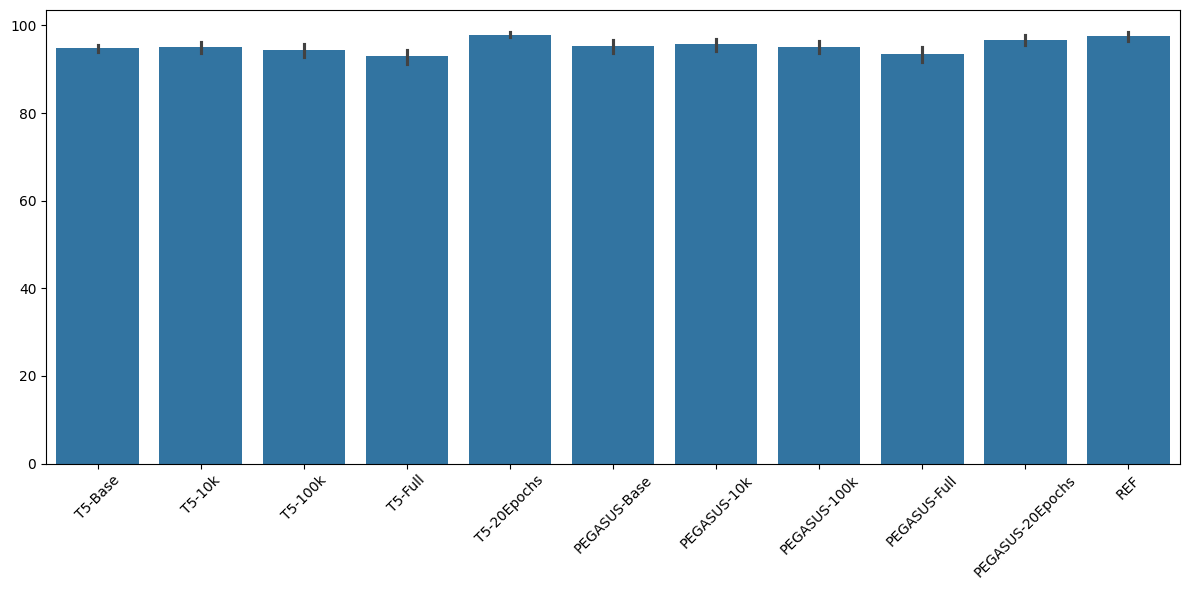

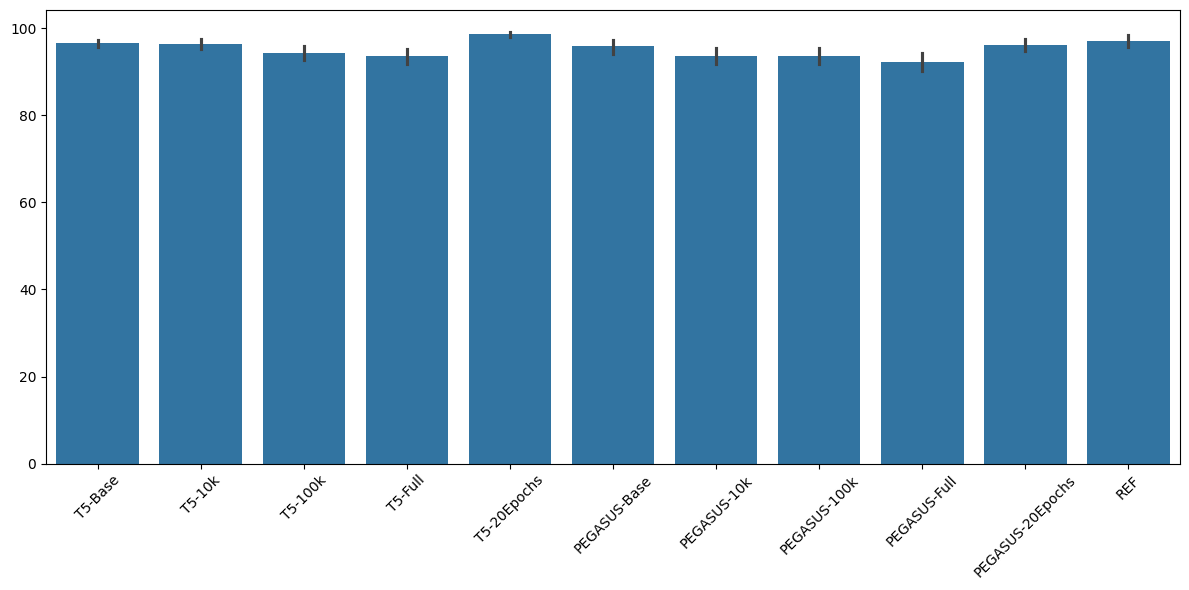

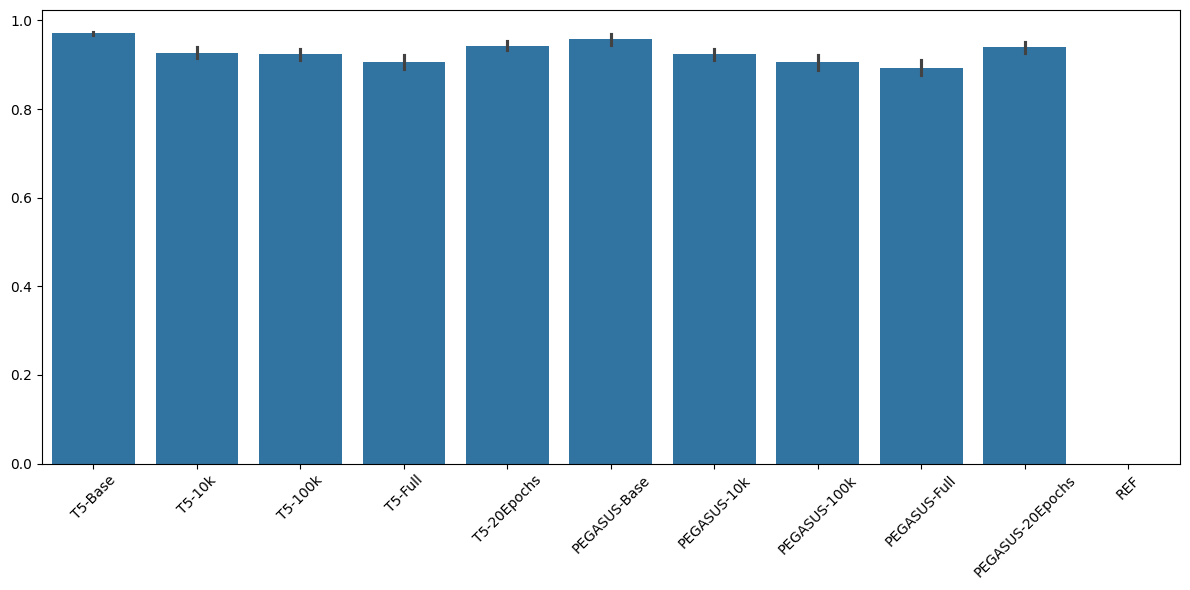

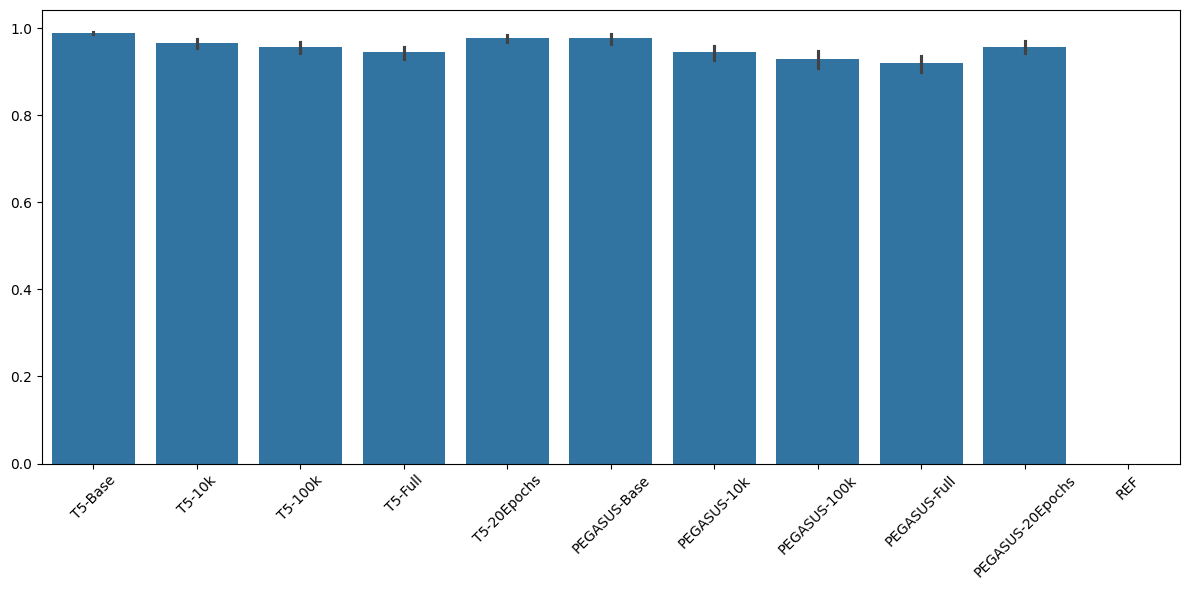

In [ ]:
# Plot each metric.
plot_metric(ngram_results_df, 'Distinct-2')
plot_metric(ngram_results_df, 'Distinct-3')
plot_metric(ngram_results_df, 'Bigram Abstractiveness')
plot_metric(ngram_results_df, 'Trigram Abstractiveness')